## Rosenblatt’s Algorithm


In [1]:
pip install scikit-learn==1.1.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 18.0 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2
Note: you may need to restart the kernel to use updated packages.


In [6]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
boston = load_boston()
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df['MEDV'] = boston.target
boston_df.head()

Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.
    :func:`~sklearn.datasets.fetch_california_housing`) and the Ames housing
    datase

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


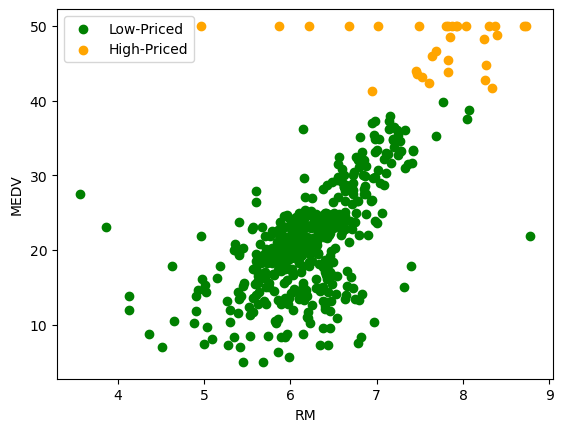

The resulting plot should show a clear separation between high-priced and low-priced homes, with high-priced homes tending to have higher values of both MEDV and RM.


In [7]:
boston_df['high-Priced'] = (boston_df['MEDV'] > 40).astype(int)
#print(boston_df.head())
plt.scatter(boston_df[boston_df['high-Priced'] == 0]['RM'], boston_df[boston_df['high-Priced'] == 0]['MEDV'], color='green', label='Low-Priced')
plt.scatter(boston_df[boston_df['high-Priced'] == 1]['RM'], boston_df[boston_df['high-Priced'] == 1]['MEDV'], color='orange', label='High-Priced')
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.legend()
plt.show()
print("The resulting plot should show a clear separation between high-priced and low-priced homes, with high-priced homes tending to have higher values of both MEDV and RM.")

In [8]:
X = boston_df[['RM', 'MEDV']].values
Y = boston_df['high-Priced']
#print(X)
#print(Y)
print('Shape of X:', X.shape)
print('Shape of Y:', Y.shape)

Shape of X: (506, 2)
Shape of Y: (506,)


In [9]:
import numpy as np
X = np.c_[np.ones((boston_df.shape[0], 1)), boston_df[['RM', 'MEDV']].values]
print('X:\n', X[:5])

X:
 [[ 1.     6.575 24.   ]
 [ 1.     6.421 21.6  ]
 [ 1.     7.185 34.7  ]
 [ 1.     6.998 33.4  ]
 [ 1.     7.147 36.2  ]]


In [10]:
step = 1
weights = np.random.rand(X.shape[1])
print('Step size:', step)
print('Starting weights:', weights)

Step size: 1
Starting weights: [0.84992578 0.69733392 0.55256964]


In [11]:
def myPerceptron(X, Y, weights, step):
    errors = 0
    for i in range(X.shape[0]):
        prediction = np.dot(X[i], weights)
        if prediction > 0:
            y_hat = 1
        else:
            y_hat = 0
        if y_hat != Y[i]:
            errors += 1
            weights += step * (Y[i] - y_hat) * X[i]
            
    return weights, errors

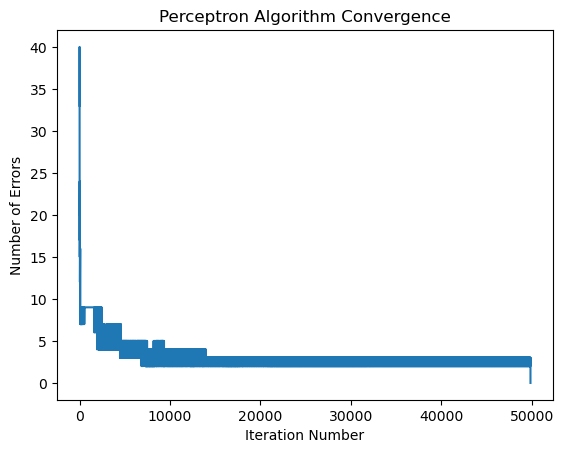

The perceptron algorithm took 49854 iterations to converge.

The convergence rate did not change much with a change in alpha, the lowest number of iterations were ~49,000

Yes, gradient descent would generate a plot of errors vs iteration that looks similar to the plot generated by the perceptron algorithm. This is because both the perceptron algorithm and gradient descent are iterative optimization algorithms that aim to minimize a cost function by adjusting the weights of the model. As the algorithm iteratively updates the weights, the number of errors decreases, and the cost function decreases as well. Therefore, the plot of errors vs iteration (epoch) for both algorithms would have a similar shape. However, the specific details of the plot such as the convergence rate and the final number of errors achieved may differ depending on the specific dataset


In [12]:
errors = 1
num_iterations = 0
error_list = []

while errors > 0:
    weights, errors = myPerceptron(X, Y, weights, step)
    num_iterations += 1
    error_list.append(errors)

# Plot the number of errors vs iteration number
plt.plot(range(num_iterations), error_list)
plt.xlabel("Iteration Number")
plt.ylabel("Number of Errors")
plt.title("Perceptron Algorithm Convergence")
plt.show()

print(f"The perceptron algorithm took {num_iterations} iterations to converge.")
print("\nThe convergence rate did not change much with a change in alpha, the lowest number of iterations were ~49,000")
print("\nYes, gradient descent would generate a plot of errors vs iteration that looks similar to the plot generated by the perceptron algorithm. This is because both the perceptron algorithm and gradient descent are iterative optimization algorithms that aim to minimize a cost function by adjusting the weights of the model. As the algorithm iteratively updates the weights, the number of errors decreases, and the cost function decreases as well. Therefore, the plot of errors vs iteration (epoch) for both algorithms would have a similar shape. However, the specific details of the plot such as the convergence rate and the final number of errors achieved may differ depending on the specific dataset")

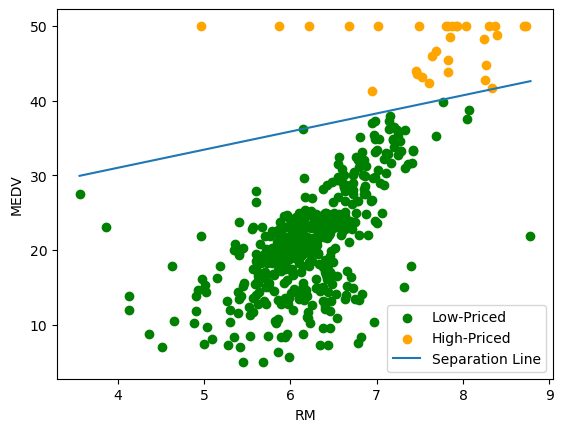

The plot shows the separation line between the two classes (low-priced and high-priced houses) generated by the perceptron algorithm. The line separates the two classes by minimizing the classification error. 


In [13]:

plt.scatter(boston_df[boston_df['high-Priced'] == 0]['RM'], boston_df[boston_df['high-Priced'] == 0]['MEDV'], color='green', label='Low-Priced')
plt.scatter(boston_df[boston_df['high-Priced'] == 1]['RM'], boston_df[boston_df['high-Priced'] == 1]['MEDV'], color='orange', label='High-Priced')
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.legend()

x_vals = np.array([np.min(X[:, 1]), np.max(X[:, 1])])
y_vals = -(weights[0] + weights[1]*x_vals) / weights[2]
plt.plot(x_vals, y_vals, label='Separation Line')
plt.legend()

plt.show()
print("The plot shows the separation line between the two classes (low-priced and high-priced houses) generated by the perceptron algorithm. The line separates the two classes by minimizing the classification error. ")


## Out-of-the-box Neural Networks

In [14]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(boston_df.iloc[:,:-2], boston_df['MEDV'], test_size=0.2, random_state=2)

# Print the sizes of the training and testing sets
print("Training set size (X):", X_train.shape)
print("Training set size (y):", y_train.shape)
print("Testing set size (X):", X_test.shape)
print("Testing set size (y):", y_test.shape)


Training set size (X): (404, 13)
Training set size (y): (404,)
Testing set size (X): (102, 13)
Testing set size (y): (102,)


In [17]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score,mean_squared_error
hidden_layer_sizes = [2, 5, 10, 20, 50]

# train neural networks with a single hidden layer for each size
train_scores = []
test_scores = []
train_mse = []
test_mse = []

for size in hidden_layer_sizes:
    model = MLPRegressor(hidden_layer_sizes=(size,), max_iter=1000,random_state=2)
    model.fit(X_train, y_train)
    
    # predict on training set and evaluate performance
    y_train_pred = model.predict(X_train)
    train_scores.append(r2_score(y_train, y_train_pred))
    train_mse.append(mean_squared_error(y_train, y_train_pred))
    
    # predict on test set and evaluate performance
    y_test_pred = model.predict(X_test)
    test_scores.append(r2_score(y_test, y_test_pred))
    test_mse.append(mean_squared_error(y_test, y_test_pred))

# print results
print("Single Hidden Layer Neural Networks:\n")
for i, size in enumerate(hidden_layer_sizes):
    print("Hidden Layer Size: ", size)
    print("Training R^2 Score: ", train_scores[i])
    print("Test R^2 Score: ", test_scores[i])
    print("Training MSE: ", train_mse[i])
    print("Test MSE: ", test_mse[i])
    print()
print("We see that the model with 20 neurons performs the best on the test dataset. We see that the model with 50 neurons performs the best on the train dataset.")

Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.


Single Hidden Layer Neural Networks:

Hidden Layer Size:  2
Training R^2 Score:  -4.853211222107122
Test R^2 Score:  -5.124003704870604
Training MSE:  495.0054888657084
Test MSE:  512.3322016168851

Hidden Layer Size:  5
Training R^2 Score:  0.28406407959894353
Test R^2 Score:  0.33553041034884445
Training MSE:  60.54662933333657
Test MSE:  55.58931447129779

Hidden Layer Size:  10
Training R^2 Score:  0.4739052809387033
Test R^2 Score:  0.5517568121369316
Training MSE:  44.49177788339835
Test MSE:  37.499882489458614

Hidden Layer Size:  20
Training R^2 Score:  0.5377585864303213
Test R^2 Score:  0.6201035038976247
Training MSE:  39.091710210940235
Test MSE:  31.782020001044856

Hidden Layer Size:  50
Training R^2 Score:  0.29371162758340286
Test R^2 Score:  0.4643077051945116
Training MSE:  59.7307371631778
Test MSE:  44.815846954602115

We see that the model with 20 neurons performs the best on the test dataset. We see that the model with 50 neurons performs the best on the train da

In [18]:
hidden_layer_sizes = [(2,2), (5,5), (10,10), (20,20), (50,50)]
train_scores = []
test_scores = []
train_mse = []
test_mse = []

for size in hidden_layer_sizes:
    model = MLPRegressor(hidden_layer_sizes=size, max_iter=1500,random_state=2)
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    train_scores.append(r2_score(y_train, y_train_pred))
    test_scores.append(r2_score(y_test, y_test_pred))
    train_mse.append(mean_squared_error(y_train, y_train_pred))
    test_mse.append(mean_squared_error(y_test, y_test_pred))

print("Two Hidden Layer Neural Networks:\n")
for i, size in enumerate(hidden_layer_sizes):
    print("Hidden Layer Sizes: ", size)
    print("Training R^2 Score: ", train_scores[i])
    print("Test R^2 Score: ", test_scores[i])
    print("Training MSE: ", train_mse[i])
    print("Test MSE: ", test_mse[i])
    print()
print("With two hidden layers the model with 20 nuerons seems to be performing the best, with the highest r square and the lowest mean square error for test data ")

Two Hidden Layer Neural Networks:

Hidden Layer Sizes:  (2, 2)
Training R^2 Score:  -0.0074662271601606545
Test R^2 Score:  -0.018628467239637736
Training MSE:  85.20131827936606
Test MSE:  85.21813349581303

Hidden Layer Sizes:  (5, 5)
Training R^2 Score:  0.200836221044576
Test R^2 Score:  0.2500203517118429
Training MSE:  67.5852010246072
Test MSE:  62.74305877211212

Hidden Layer Sizes:  (10, 10)
Training R^2 Score:  0.22808071351811599
Test R^2 Score:  0.3930609632532769
Training MSE:  65.2811370152944
Test MSE:  50.77632671847812

Hidden Layer Sizes:  (20, 20)
Training R^2 Score:  0.378498903808686
Test R^2 Score:  0.5243964737924691
Training MSE:  52.56028567511769
Test MSE:  39.78883969075043

Hidden Layer Sizes:  (50, 50)
Training R^2 Score:  0.4572985063473394
Test R^2 Score:  0.4861467493032592
Training MSE:  45.89621115312776
Test MSE:  42.98879947248774

With two hidden layers the model with 20 nuerons seems to be performing the best, with the highest r square and the lowe

In [19]:
hidden_layer_sizes = [(20,),(30,),(20,20),(30,30),(20,20,20),(30,30,30),(20,20,20,20),(30,30,30,30)] 
#trying different number of nuerons and hidden layers
train_scores = []
test_scores = []
train_mse = []
test_mse = []

for size in hidden_layer_sizes:
    model = MLPRegressor(hidden_layer_sizes=size, max_iter=2000,random_state=2)
    #increased max iterations to 2000 so that it converges correctly
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    train_scores.append(r2_score(y_train, y_train_pred))
    test_scores.append(r2_score(y_test, y_test_pred))
    train_mse.append(mean_squared_error(y_train, y_train_pred))
    test_mse.append(mean_squared_error(y_test, y_test_pred))

for i, size in enumerate(hidden_layer_sizes):
    print("Hidden Layer Sizes: ", size)
    print("Training R^2 Score: ", train_scores[i])
    print("Test R^2 Score: ", test_scores[i])
    print("Training MSE: ", train_mse[i])
    print("Test MSE: ", test_mse[i])
    print()

print("2 hidden layer nueral network with 30 neurons each seems to be working best")

Hidden Layer Sizes:  (20,)
Training R^2 Score:  0.5377585864303213
Test R^2 Score:  0.6201035038976247
Training MSE:  39.091710210940235
Test MSE:  31.782020001044856

Hidden Layer Sizes:  (30,)
Training R^2 Score:  0.161237295554019
Test R^2 Score:  0.2214497272282031
Training MSE:  70.93407820111774
Test MSE:  65.13326812675878

Hidden Layer Sizes:  (20, 20)
Training R^2 Score:  0.378498903808686
Test R^2 Score:  0.5243964737924691
Training MSE:  52.56028567511769
Test MSE:  39.78883969075043

Hidden Layer Sizes:  (30, 30)
Training R^2 Score:  0.600176158255611
Test R^2 Score:  0.6672785262656672
Training MSE:  33.81306239134809
Test MSE:  27.835372638319974

Hidden Layer Sizes:  (20, 20, 20)
Training R^2 Score:  0.300933431484646
Test R^2 Score:  0.3870360494720405
Training MSE:  59.11998992803185
Test MSE:  51.28036908860891

Hidden Layer Sizes:  (30, 30, 30)
Training R^2 Score:  0.5466716297836618
Test R^2 Score:  0.6559319310824341
Training MSE:  38.337935024126914
Test MSE:  28.

## Using SHAP

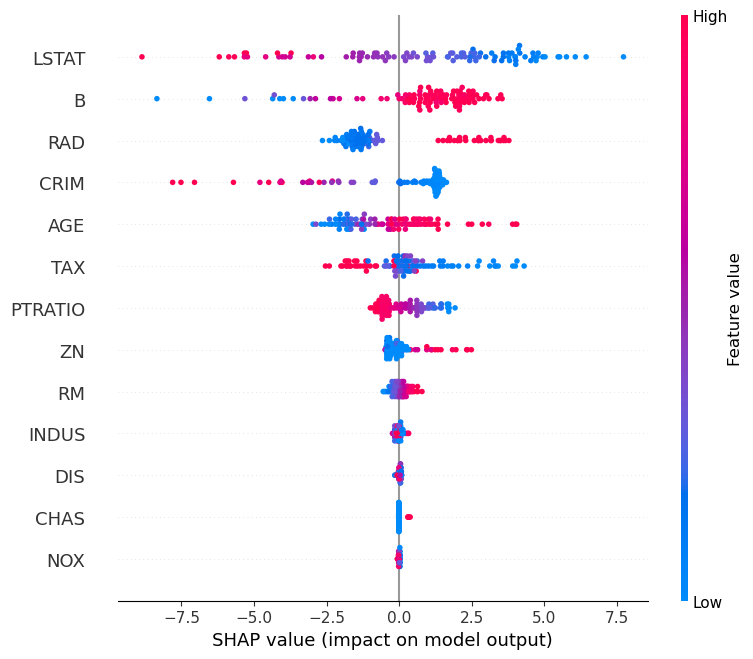

We see that the 'LSTAT' and 'B' feature have a high impact on the predicted house price. High values of 'LSTAT' and low values of 'B' are associated with lower house prices, while low values of 'LSTAT' and high values of 'B' are associated with higher house prices. This observation raises ethical concerns, as it suggests that the model might be leveraging race as a factor in determining house prices


In [33]:
import shap

model = MLPRegressor(hidden_layer_sizes=(30, 30), max_iter=2000, random_state=2)
model.fit(X_train, y_train)

data = boston_df.columns[:-2].tolist()

# define function to explain predictions
def model_fn(x):
    return model.predict(x)

masker = shap.maskers.Independent(X_train)

# compute SHAP values
explainer = shap.Explainer(model_fn, masker)
shap_values = explainer(X_test)

# get feature names
feature_names = data

shap.summary_plot(shap_values, X_test, feature_names=feature_names)
print("We see that the 'LSTAT' and 'B' feature have a high impact on the predicted house price. High values of 'LSTAT' and low values of 'B' are associated with lower house prices, while low values of 'LSTAT' and high values of 'B' are associated with higher house prices. This observation raises ethical concerns, as it suggests that the model might be leveraging race as a factor in determining house prices")


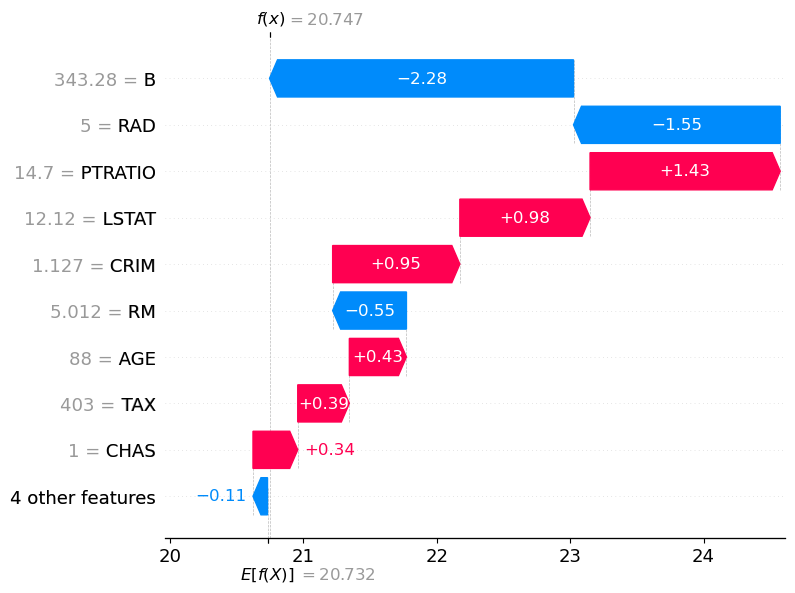

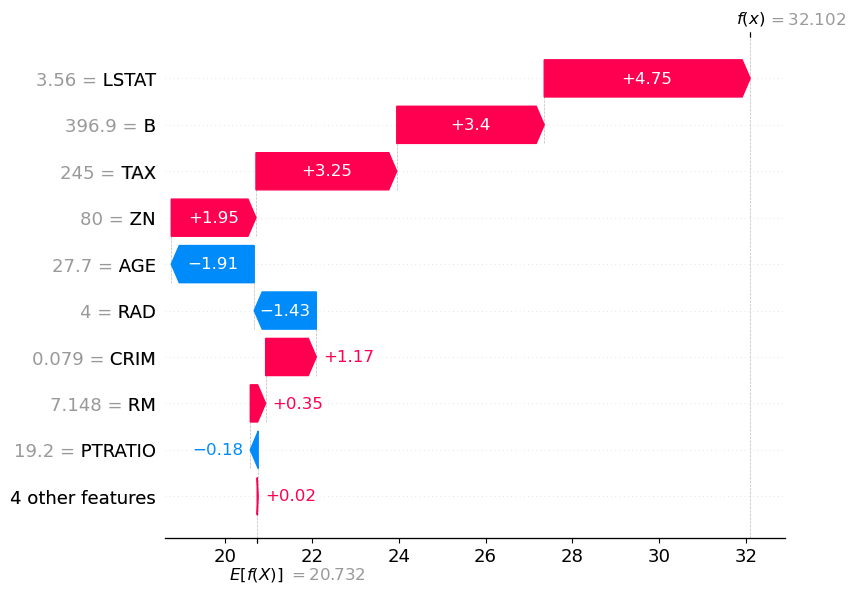

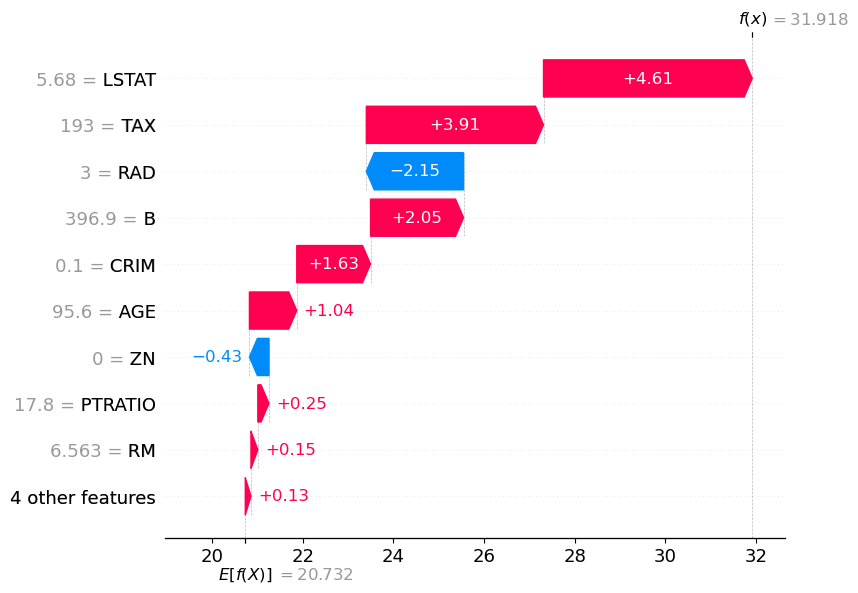

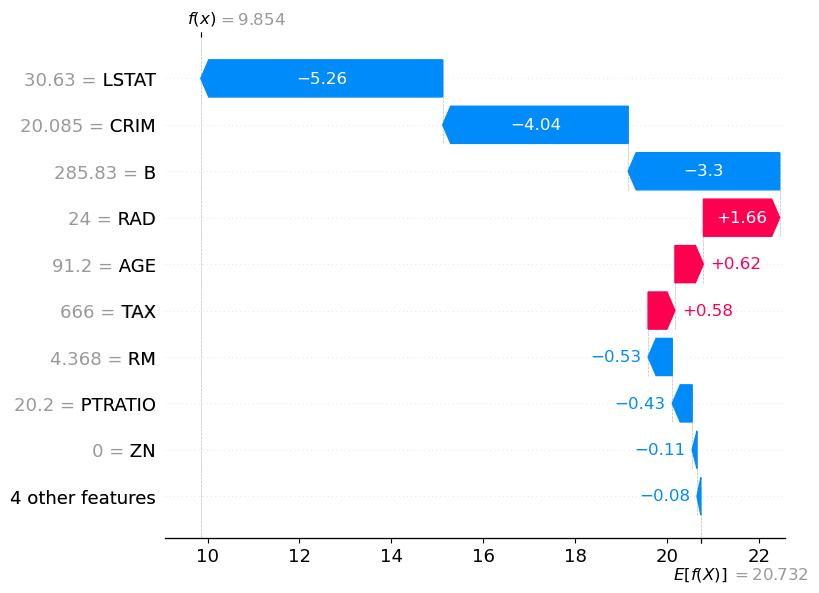

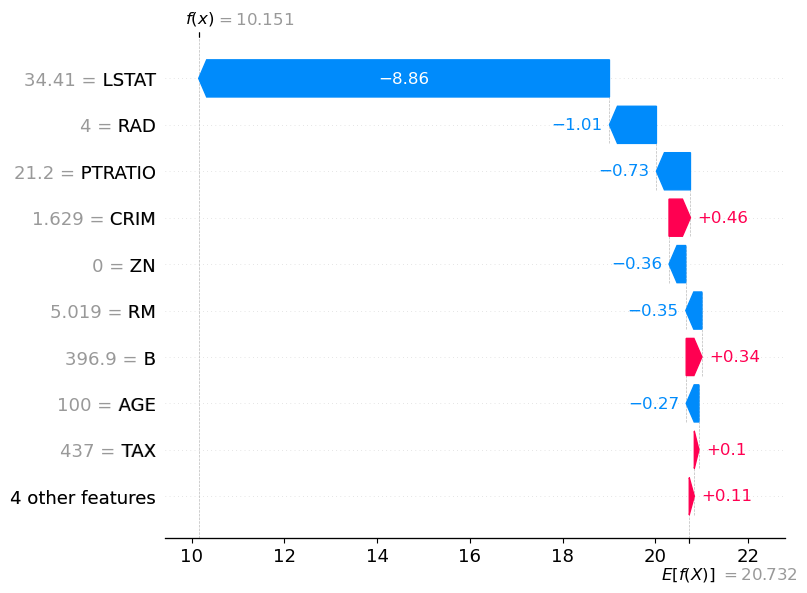

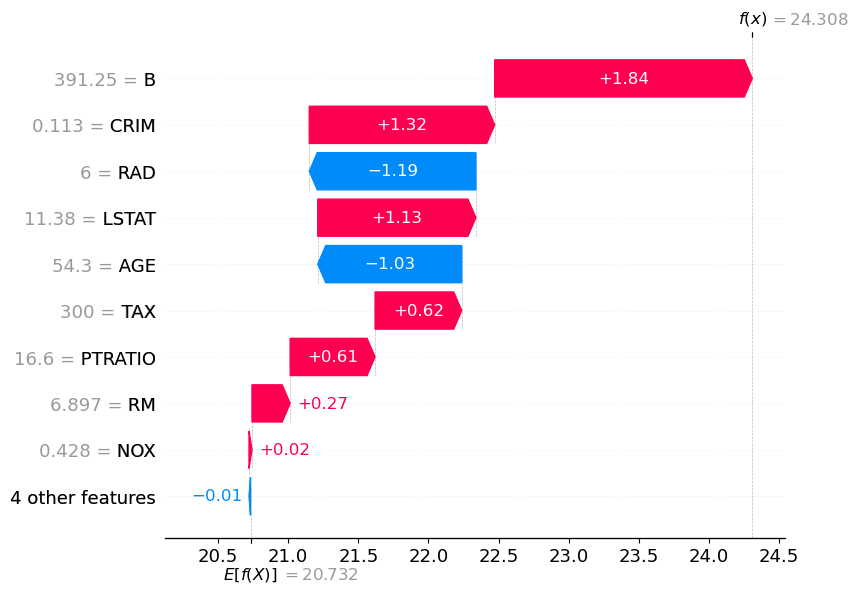

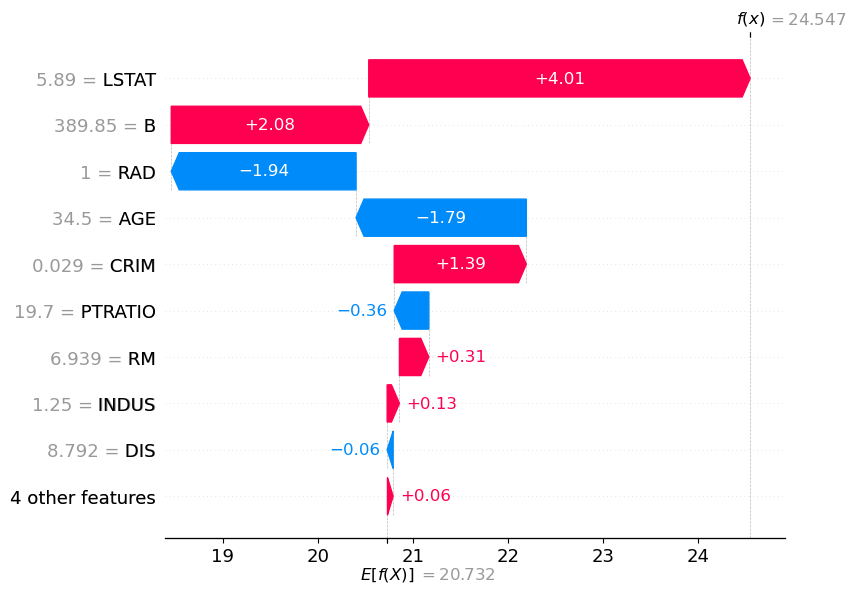

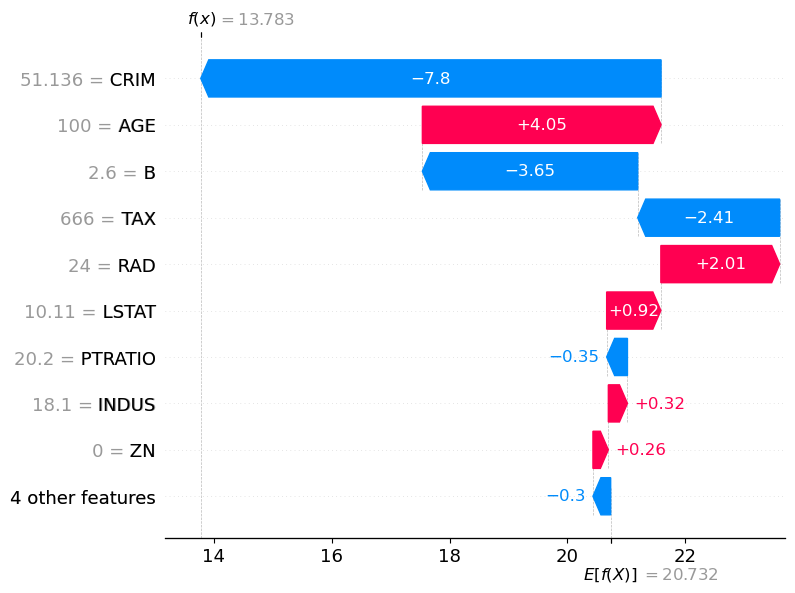

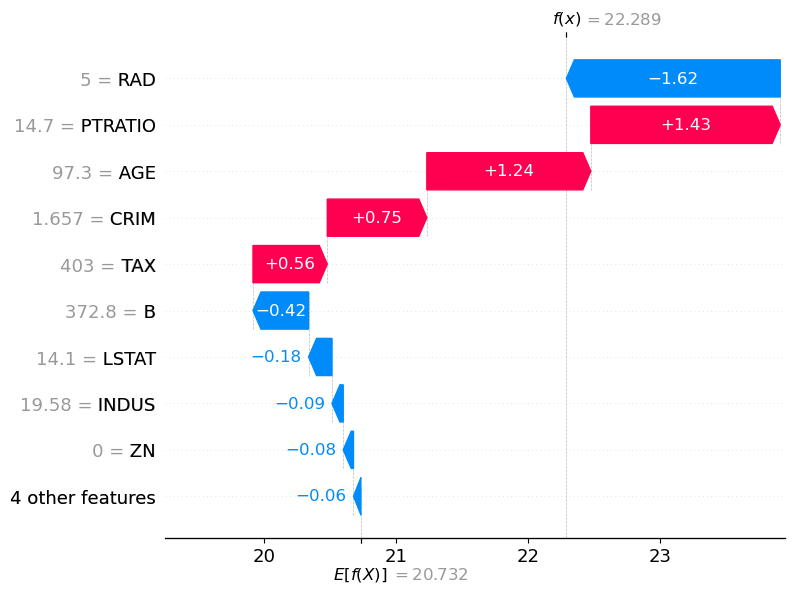

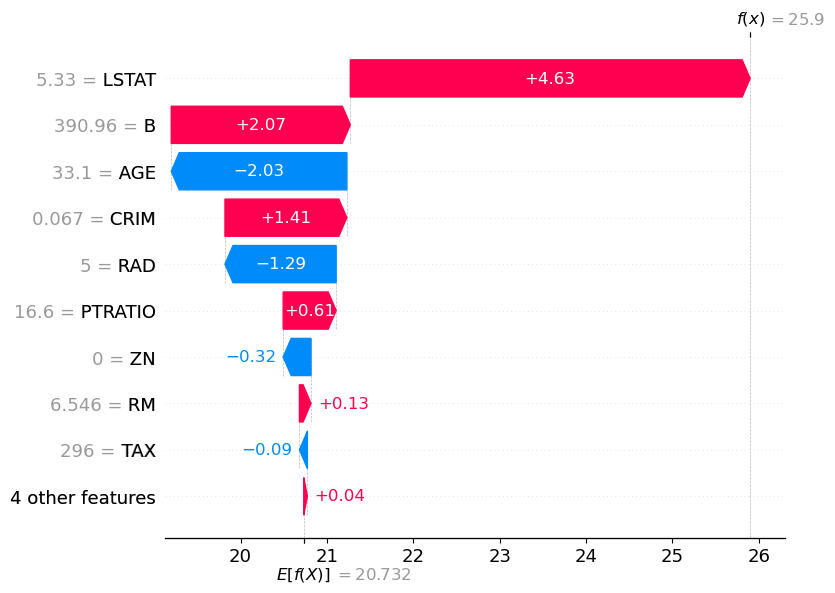

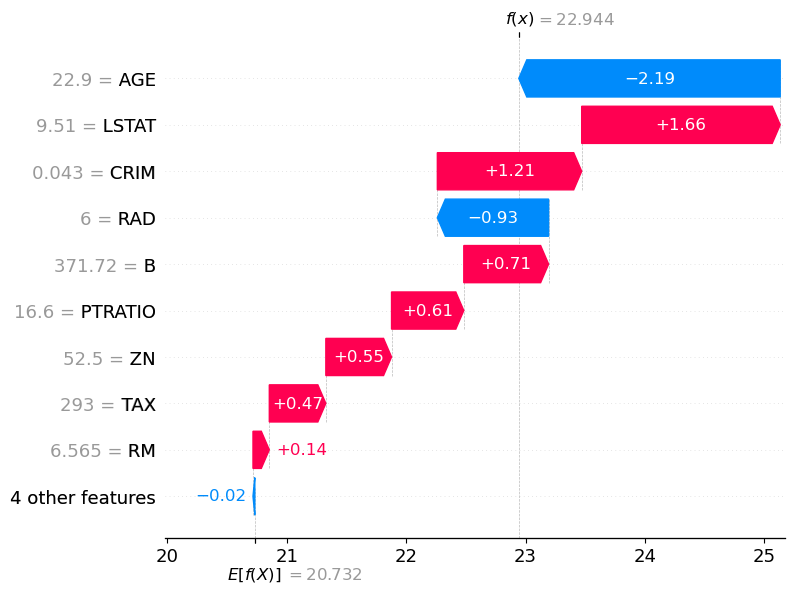

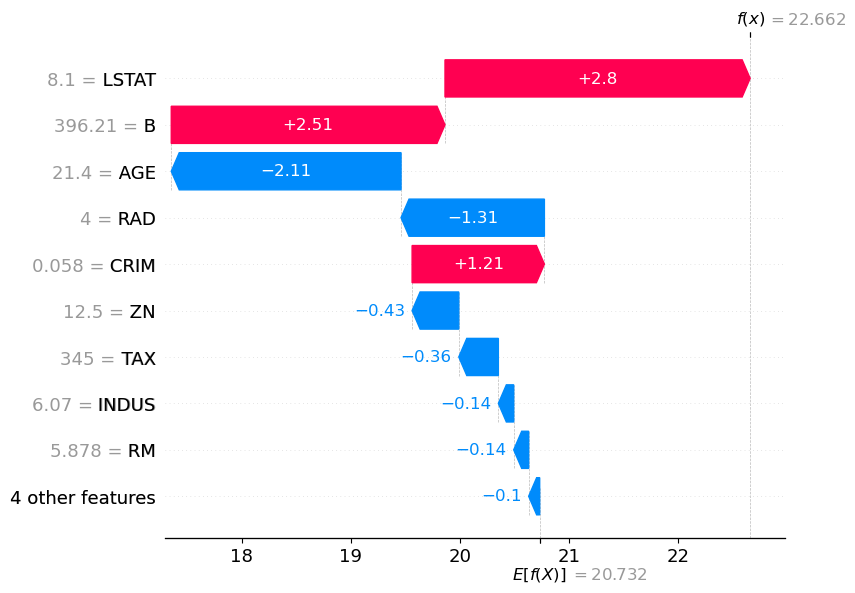

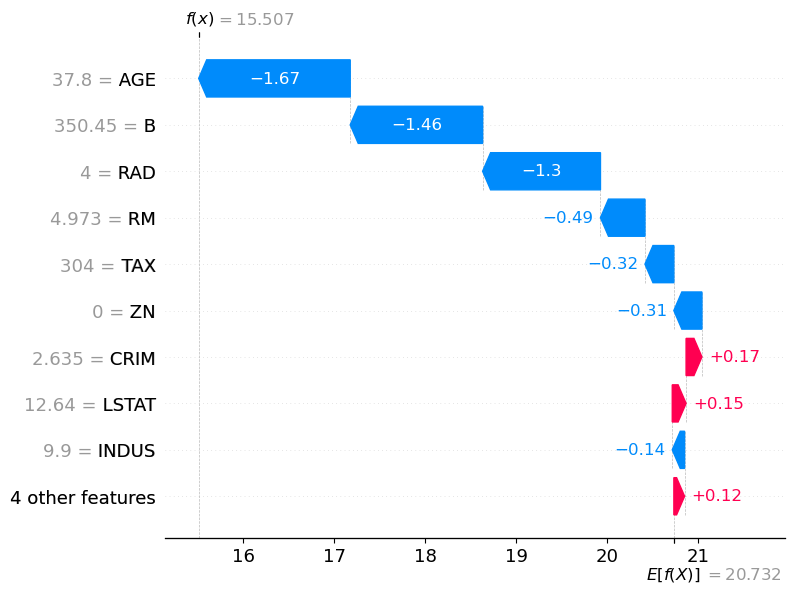

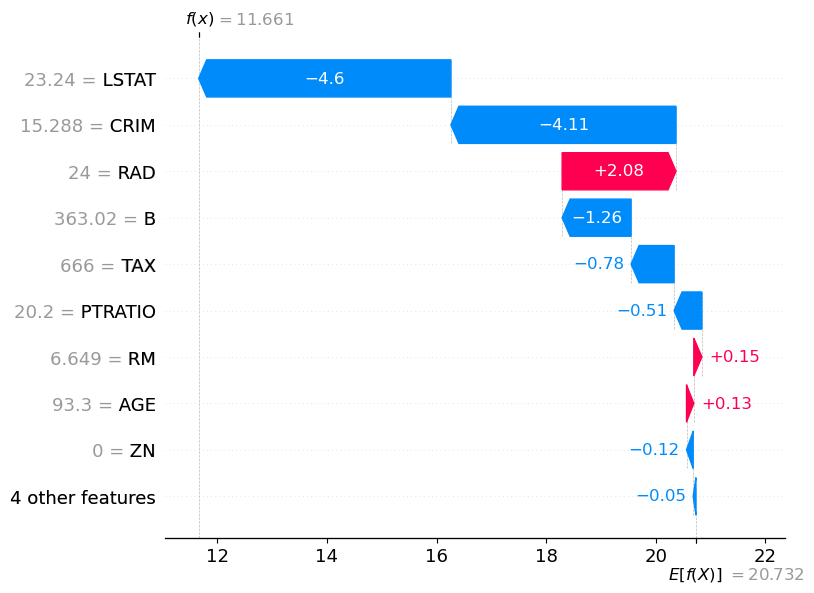

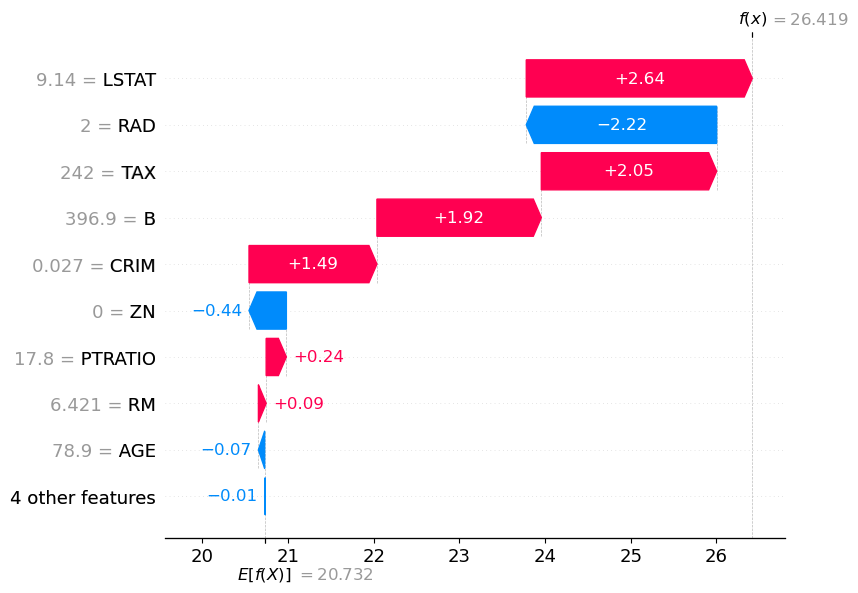

The model is relying on discriminatory features like lsat and b for prediction


In [36]:
import shap

# assume shap_values is a list of shapley values for multiple instances
for sv in range (1, 16):
    shap.plots.waterfall(shap_values[sv])
print("The model is relying on discriminatory features like lsat and b for prediction")

In [29]:
print("I believe that using these columns are problematic in the context of a predictive analysis. Predictive models will learn the patterns of systemic racism and classism encoded in the data and will reproduce those patterns in their predictions. It is important to investigate and address any potential bias in machine learning models, especially when they are used to make important decisions that affect people's lives")

I believe that using these columns are problematic in the context of a predictive analysis. Predictive models will learn the patterns of systemic racism and classism encoded in the data and will reproduce those patterns in their predictions. It is important to investigate and address any potential bias in machine learning models, especially when they are used to make important decisions that affect people's lives
